# chunked_func
an example for the use of porespy.filters.chunked_func

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from skimage.morphology import ball

Applies the function spcified by "func" to the input image in parallel using dask.
If "cores" is 1, one chunk is porcessed at a time, saving memory. If "cores" is larger than one, then multiple cores are processed at once, saving time.

Generate input image and variables:

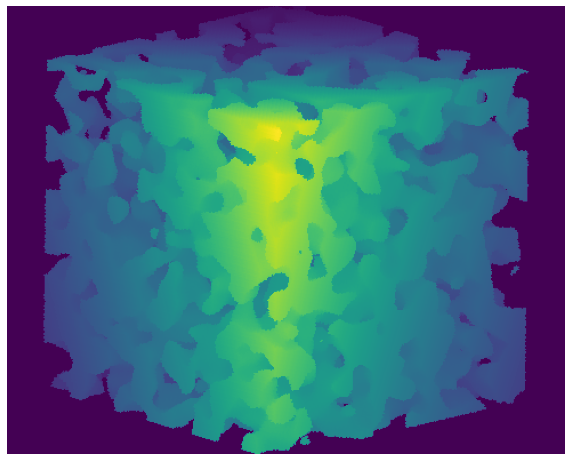

In [2]:
func = spim.binary_dilation
overlap = 7
divs = 2
cores = 1
im_arg = "input"#["input", "image", "im"]
strel_arg = "structure" #["strel", "structure", "footprint"]
im = ps.generators.blobs(shape=[300, 300, 300])
kwargs = {"input": im, "structure" : ball(3)}

three_d1 = ps.visualization.show_3D(im)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(three_d1)

Apply filter:

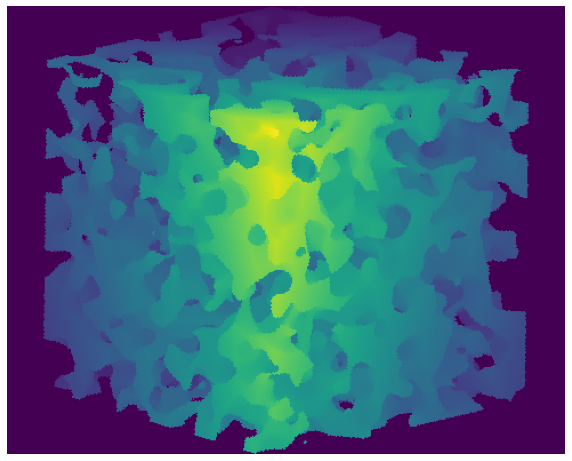

In [3]:
x = ps.filters.chunked_func(func, overlap, divs, cores, im_arg, strel_arg, **kwargs)

three_dx = ps.visualization.show_3D(x)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(three_dx)